In [43]:
import sys
import os
sys.path.append(os.path.abspath('../../'))
sys.path.append(os.path.abspath('../../models/'))
sys.path.append(os.path.abspath('../../helpers/'))
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# We're ignoring some warning from sklearn.metrics.classification_report
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)
import numpy as np
#from helpers.utils import print_metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from helpers.database_helpers import get_stratified_kfold
from models.icq_estimators import IcqClassifier
from helpers.icq_executions import execute_classifier_split_input_weight_normal_sigma_q, execute_classifier_split_input_weight_polar_sigma_q
import matplotlib.pyplot as plt
### Setting up database, k-fold and random seed
# Dá pra usar caminhos relativos, não tem pra quê colocar tudo de uma vez não
path_to_datasets = "Datasets_template_exp/" 
dataset_name = "circles.npy"

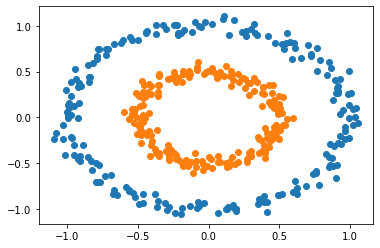

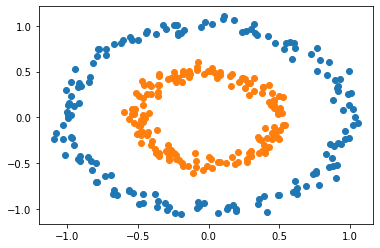

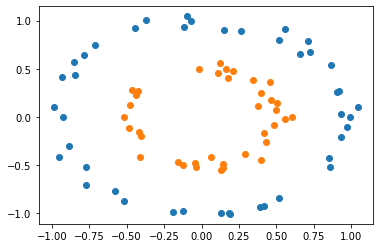

In [8]:
# Dá pra usar caminhos relativos, não tem pra quê colocar tudo de uma vez não
path_to_datasets = "Datasets_template_exp/" 
dataset_name = "circles.npy"
seed = 40
dataset = np.load( path_to_datasets + dataset_name)

X,y = dataset[:,:-1],dataset[:,-1]

X0 = X[y == 0]
X1 = X[y == 1]

plt.plot(X0[:,0],X0[:,1],'o')
plt.plot(X1[:,0],X1[:,1],'o')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

plt.plot(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1],'o')
plt.plot(X_train[y_train == 1][:,0],X_train[y_train == 1][:,1],'o')
plt.show()

plt.plot(X_test[y_test == 0][:,0],X_test[y_test == 0][:,1],'o')
plt.plot(X_test[y_test == 1][:,0],X_test[y_test == 1][:,1],'o')
plt.show()


cv = get_stratified_kfold(random_seed=seed)

In [44]:
from helpers.prediction_visualization import vizualize_prediction

              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       157
         1.0       0.00      0.00      0.00       163

    accuracy                           0.49       320
   macro avg       0.25      0.50      0.33       320
weighted avg       0.24      0.49      0.32       320

(array([0]), array([320], dtype=int64))


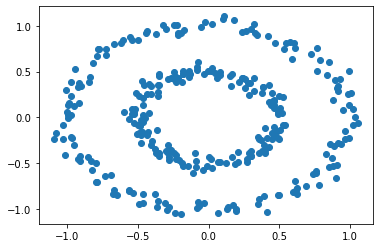

In [46]:
icq = IcqClassifier(classifier_function=execute_classifier_split_input_weight_normal_sigma_q,
                    max_iter=2000, 
                    random_seed=seed, 
                    plot_graphs_and_metrics=False,
                    do_classes_refit=False,
                    sigma_q_weights = [3, 10, 6])

vizualize_prediction(icq, X_train, y_train)

              precision    recall  f1-score   support

         0.0       0.49      0.62      0.55       157
         1.0       0.51      0.39      0.44       163

    accuracy                           0.50       320
   macro avg       0.50      0.50      0.49       320
weighted avg       0.50      0.50      0.49       320

(array([0, 1]), array([197, 123], dtype=int64))


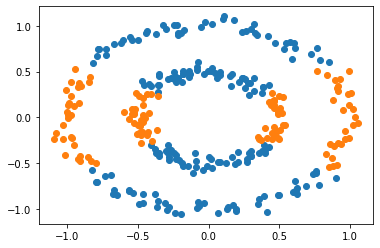

In [45]:
icq = IcqClassifier(classifier_function=execute_classifier_split_input_weight_normal_sigma_q,
                    max_iter=2000, 
                    random_seed=seed, 
                    plot_graphs_and_metrics=False,
                    do_classes_refit=False,
                    sigma_q_weights = [1, 1, 1])

vizualize_prediction(icq, X_train, y_train)

              precision    recall  f1-score   support

         0.0       0.49      0.62      0.55       157
         1.0       0.51      0.39      0.44       163

    accuracy                           0.50       320
   macro avg       0.50      0.50      0.49       320
weighted avg       0.50      0.50      0.49       320

(array([0, 1]), array([197, 123], dtype=int64))


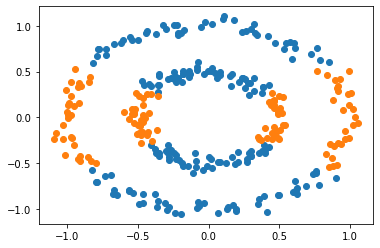

In [47]:
icq = IcqClassifier(classifier_function=execute_classifier_split_input_weight_normal_sigma_q,
                    max_iter=200_000, 
                    random_seed=seed, 
                    plot_graphs_and_metrics=False,
                    do_classes_refit=False,
                    sigma_q_weights = [1, 1, 1])

vizualize_prediction(icq, X_train, y_train)

Tentativa no linear_sep

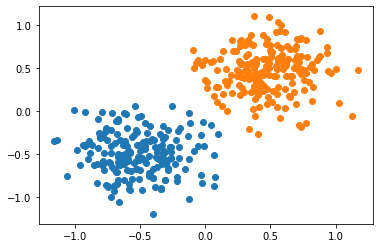

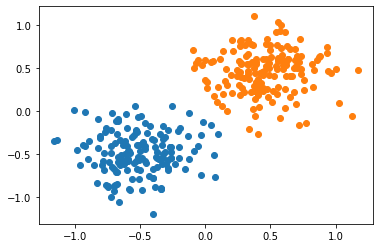

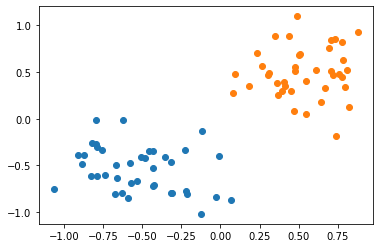

In [48]:
# Dá pra usar caminhos relativos, não tem pra quê colocar tudo de uma vez não
path_to_datasets = "Datasets_template_exp/" 
dataset_name = "linear_sep.npy"
seed = 40
dataset = np.load( path_to_datasets + dataset_name)

X,y = dataset[:,:-1],dataset[:,-1]

X0 = X[y == 0]
X1 = X[y == 1]

plt.plot(X0[:,0],X0[:,1],'o')
plt.plot(X1[:,0],X1[:,1],'o')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

plt.plot(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1],'o')
plt.plot(X_train[y_train == 1][:,0],X_train[y_train == 1][:,1],'o')
plt.show()

plt.plot(X_test[y_test == 0][:,0],X_test[y_test == 0][:,1],'o')
plt.plot(X_test[y_test == 1][:,0],X_test[y_test == 1][:,1],'o')
plt.show()


              precision    recall  f1-score   support

         0.0       0.52      0.77      0.62       160
         1.0       0.55      0.29      0.38       160

    accuracy                           0.53       320
   macro avg       0.54      0.53      0.50       320
weighted avg       0.54      0.53      0.50       320

(array([0, 1]), array([237,  83], dtype=int64))


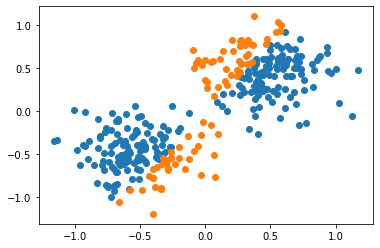

In [50]:
icq = IcqClassifier(classifier_function=execute_classifier_split_input_weight_normal_sigma_q,
                    max_iter=2_000_000, 
                    random_seed=seed, 
                    plot_graphs_and_metrics=False,
                    do_classes_refit=False,
                    sigma_q_weights = [1, 1, 1])

vizualize_prediction(icq, X_train, y_train)